you can find datasets in kaggle , check readme for datasets links . Also you can see these notebook from my kaggle page , you can find link in readme file

In [2]:
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
""" 

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

**HELLO HELLO , in this dataset you are gonna find different plots (world map , bar , scatter ,graph, pie chart,correlation matrix) .**

* Cleaning Dataset
* drop unuseful values , column
* Adding new columns
* Analyse data
* PLOTTING

 **import necessary libraries**

In [3]:
import pandas as pd # for dataframe , analyse
import matplotlib.pyplot as plt # for static visualization 
import numpy as np # everything
import seaborn as sns  # for heat map  
import plotly.express as px # for interactive bars , world map 

**Reading Dataset**

In [4]:
df=pd.read_csv("datasets/world_university_rank.csv")
df.head(8)

Rank                        University name locationLocation  \
0    1                   University of Oxford   United Kingdom   
1    2                     Harvard University    United States   
2    3                University of Cambridge   United Kingdom   
3    3                    Stanford University    United States   
4    5  Massachusetts Institute of Technology    United States   
5    6     California Institute of Technology    United States   
6    7                   Princeton University    United States   
7    8     University of California, Berkeley    United States   

  Number of Studnet  Number of student per staffs International Student  \
0            20,965                          10.6                   42%   
1            21,887                           9.6                   25%   
2            20,185                          11.3                   39%   
3            16,164                           7.1                   24%   
4            11,415                           8.2                   33%   
5             2,237                           6.2                   34%   
6             8,279                           8.0                   23%   
7            40,921                          18.4                   24%   

  Female : male ratio  
0             48 : 52  
1             50 : 50  
2             47 : 53  
3             46 : 54  
4             40 : 60  
5             37 : 63  
6             46 : 54  
7             52 : 48

# Null Values

Text(0, 0.5, 'null value count ')

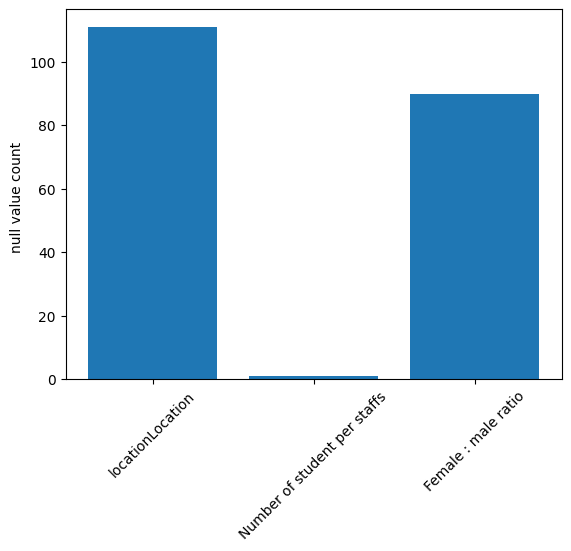

In [5]:
null_vals=df.isnull().sum()
null_vals = null_vals[null_vals>0]
plt.bar(null_vals.index,null_vals)
plt.xticks(rotation=45)
plt.ylabel("null value count ")

**we can drop null values they are not that much big , it is not gonna create major problem**

In [6]:
df.dropna(axis=0,inplace=True)  # drop all null values

In [7]:
df.columns # we need to change some column names 

Index(['Rank', 'University name', 'locationLocation', 'Number of Studnet',
       'Number of student per staffs', 'International Student',
       'Female : male ratio'],
      dtype='object')

In [8]:
# rename columns
df.rename(columns={"locationLocation":"Location","Number of Studnet":"Number of Student"},inplace=True)

# Adjust Data Types of Columns

**Lets check data types of columns**

In [9]:
df.dtypes # we need to change Number of Student,International Student data type to integer or float

Rank                             object
University name                  object
Location                         object
Number of Student                object
Number of student per staffs    float64
International Student            object
Female : male ratio              object
dtype: object

In [10]:
# there are some ',' sign in numbers lets remove them first because we can convert them into integer
df["Number of Student"]=df["Number of Student"].map(lambda x:x.replace(",",""))
df["Number of Student"]=df["Number of Student"].astype("int32") # now we convert it to integer 

In [11]:
df["International Student"]=df["International Student"].map(lambda x:x.replace("%",""))
# there are some values that they are just '' . we need to remove them 

In [12]:
drop_index=df[df["International Student"]==""].index
print(drop_index)
df.drop(drop_index,axis=0,inplace=True)

Index([873, 1861], dtype='int64')


In [13]:
df["International Student"]=df["International Student"].astype("float64") # convert float  ,percentage col

In [14]:
df.dtypes # check datatypes , now we are good 

Rank                             object
University name                  object
Location                         object
Number of Student                 int32
Number of student per staffs    float64
International Student           float64
Female : male ratio              object
dtype: object

# Adding New Columns

In [20]:
df["count"]=1 # we will use this column in future

**we can create new column for international student number and local student number**

In [21]:
df["International Student Number"]=df["Number of Student"]*(df["International Student"]/100)
df["Local Student Number"]=df["Number of Student"]*((100-df["International Student"])/100) 

In [22]:
# lets check new columns 
df.head(3)

Rank          University name        Location  Number of Student  \
0    1     University of Oxford  United Kingdom              20965   
1    2       Harvard University   United States              21887   
2    3  University of Cambridge  United Kingdom              20185   

   Number of student per staffs  International Student Female : male ratio  \
0                          10.6                   42.0             48 : 52   
1                           9.6                   25.0             50 : 50   
2                          11.3                   39.0             47 : 53   

   count  International Student Number  Local Student Number  
0      1                       8805.30              12159.70  
1      1                       5471.75              16415.25  
2      1                       7872.15              12312.85

**we can create new column for male female student number**

In [23]:
# we can find female-male number from ratio column
female_ratio_list=[]
male_ratio_list=[]

# use map function to interact with values of columns
df["Female : male ratio"].map(lambda x:female_ratio_list.append(float(str(x)[0:2])))
df["Female : male ratio"].map(lambda x:male_ratio_list.append(float(str(x)[5:7])))

male_ratio_list[:3] # check list

[52.0, 50.0, 53.0]

In [24]:
# create new list for new columns
male_number_list=list()
female_number_list=list()

i=0 

def gender_num(student_number):
    global i
    male_num=float()
    female_num=float()
    
    student_number=float(student_number)
    
    male_num=round(student_number*(male_ratio_list[i]/100))
    female_num=round(student_number*(female_ratio_list[i]/100))
    
    male_number_list.append(male_num)
    female_number_list.append(female_num)
    
    i+=1

df["Number of Student"].map(gender_num)

female_number_list[:3]

[10063, 10944, 9487]

In [25]:
# assing lists to new columns
df["Male Student Number"]=male_number_list
df["Female Student Number"]=female_number_list

In [26]:
df.head(3) # check new columns

Rank          University name        Location  Number of Student  \
0    1     University of Oxford  United Kingdom              20965   
1    2       Harvard University   United States              21887   
2    3  University of Cambridge  United Kingdom              20185   

   Number of student per staffs  International Student Female : male ratio  \
0                          10.6                   42.0             48 : 52   
1                           9.6                   25.0             50 : 50   
2                          11.3                   39.0             47 : 53   

   count  International Student Number  Local Student Number  \
0      1                       8805.30              12159.70   
1      1                       5471.75              16415.25   
2      1                       7872.15              12312.85   

   Male Student Number  Female Student Number  
0                10902                  10063  
1                10944                  10944  
2                10698                   9487

**we can add staff number column**

In [27]:
df["Staff Number"]=(df["Number of Student"]/df["Number of student per staffs"]).round()

In [28]:
df.head(3) # check for new column , it seems good

Rank          University name        Location  Number of Student  \
0    1     University of Oxford  United Kingdom              20965   
1    2       Harvard University   United States              21887   
2    3  University of Cambridge  United Kingdom              20185   

   Number of student per staffs  International Student Female : male ratio  \
0                          10.6                   42.0             48 : 52   
1                           9.6                   25.0             50 : 50   
2                          11.3                   39.0             47 : 53   

   count  International Student Number  Local Student Number  \
0      1                       8805.30              12159.70   
1      1                       5471.75              16415.25   
2      1                       7872.15              12312.85   

   Male Student Number  Female Student Number  Staff Number  
0                10902                  10063        1978.0  
1                10944                  10944        2280.0  
2                10698                   9487        1786.0

**we can add Continent column , it may be very helpful for analyse but we need to add new dataframe first**

In [29]:
continent_df=pd.read_csv("datasets/Countries-Continents.csv")
continent_df.head(3)

Continent  Country
0    Africa  Algeria
1    Africa   Angola
2    Africa    Benin

In [30]:
# we need to change Name of United States it is US in continent_df
continent_df[continent_df["Country"]=="US"]["Country"].index # find the index of USA (167)
continent_df.iloc[167]["Country"]="United States" # change US to United States

In [31]:
# for every location value find it in continent_df and find its continent and append it to contlist
contlist=list()
df["Location"].map(lambda x:contlist.append(continent_df[continent_df["Country"]==x]["Continent"]))

0       None
1       None
2       None
3       None
4       None
        ... 
2340    None
2341    None
2342    None
2343    None
2344    None
Name: Location, Length: 2150, dtype: object

In [32]:
# lets see how many countries dont have continent in df
llist=[]
m=0
for i in contlist:
    if len(i)==0:
        llist.append(np.nan)
        m+=1
    else:
        llist.append(i.values[0])
print(m) # 114 is not that much

114


In [33]:
df["Continent"]=llist
df.head(3) # it seems good 

Rank          University name        Location  Number of Student  \
0    1     University of Oxford  United Kingdom              20965   
1    2       Harvard University   United States              21887   
2    3  University of Cambridge  United Kingdom              20185   

   Number of student per staffs  International Student Female : male ratio  \
0                          10.6                   42.0             48 : 52   
1                           9.6                   25.0             50 : 50   
2                          11.3                   39.0             47 : 53   

   count  International Student Number  Local Student Number  \
0      1                       8805.30              12159.70   
1      1                       5471.75              16415.25   
2      1                       7872.15              12312.85   

   Male Student Number  Female Student Number  Staff Number      Continent  
0                10902                  10063        1978.0         Europe  
1                10944                  10944        2280.0  North America  
2                10698                   9487        1786.0         Europe

# Plotting

**Lets see student number in World Map**

In [34]:
country_student=df.groupby(["Location"])["Number of Student"].sum()
country_student

Location
Algeria       660412
Argentina     272992
Armenia         5742
Australia     890059
Austria       115042
               ...  
Uzbekistan    305032
Venezuela      40745
Vietnam       253670
Zambia         23891
Zimbabwe       20598
Name: Number of Student, Length: 116, dtype: int32

In [35]:
country_student=pd.DataFrame(country_student).reset_index()
country_student

Location  Number of Student
0       Algeria             660412
1     Argentina             272992
2       Armenia               5742
3     Australia             890059
4       Austria             115042
..          ...                ...
111  Uzbekistan             305032
112   Venezuela              40745
113     Vietnam             253670
114      Zambia              23891
115    Zimbabwe              20598

[116 rows x 2 columns]

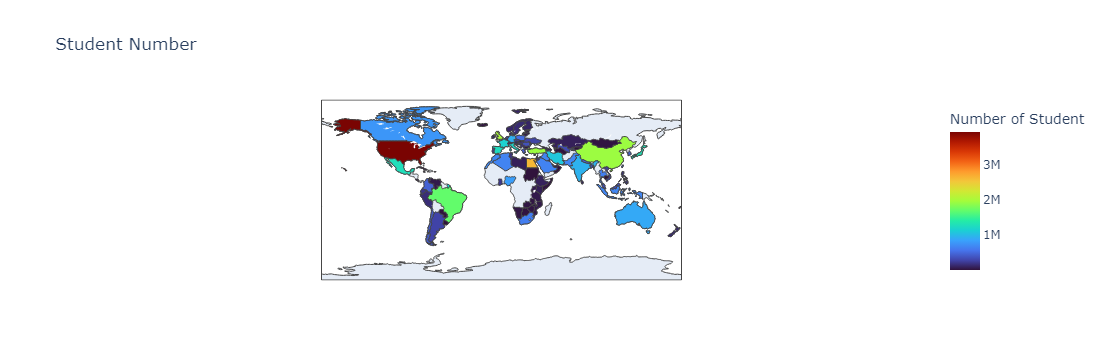

In [36]:

fig = px.choropleth(country_student, locations="Location", locationmode='country names',
        color="Number of Student", hover_name="Location", 
        color_continuous_scale="Turbo", title="Student Number")

fig.show()

**Lets see male-female count in BAR**

In [37]:
female_stud_num=df["Female Student Number"].sum()
male_stud_num=df["Male Student Number"].sum()

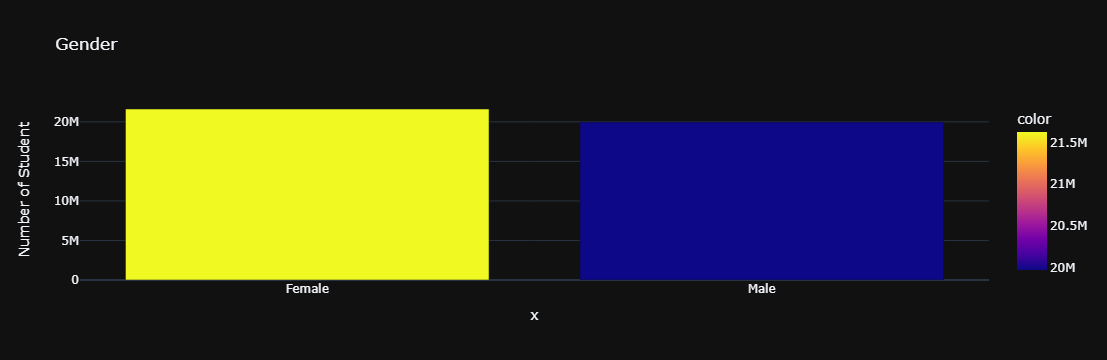

In [38]:
fig=px.bar(x=["Female","Male"],y=[female_stud_num,male_stud_num],title="Gender - Student",color=[female_stud_num,male_stud_num])

fig.update_layout(

    template="plotly_dark",
    title_text='Gender',  # Set the title of the plot
    yaxis_title="Number of Student",  # Label for the y-axis
    width=800
)

**Lets see university number for  countries (TOP50) --> HORIZONTAL BAR**

In [39]:
plt.rcParams["figure.figsize"] = (8,12) # change figure size

In [40]:
df["Location"].value_counts()

Location
United States     174
United Kingdom    163
Japan             149
India             101
Turkey             80
                 ... 
Jamaica             1
Nepal               1
Mozambique          1
Malta               1
Kosovo              1
Name: count, Length: 116, dtype: int64

Text(0.5, 1.0, 'university number for countries (TOP50)')

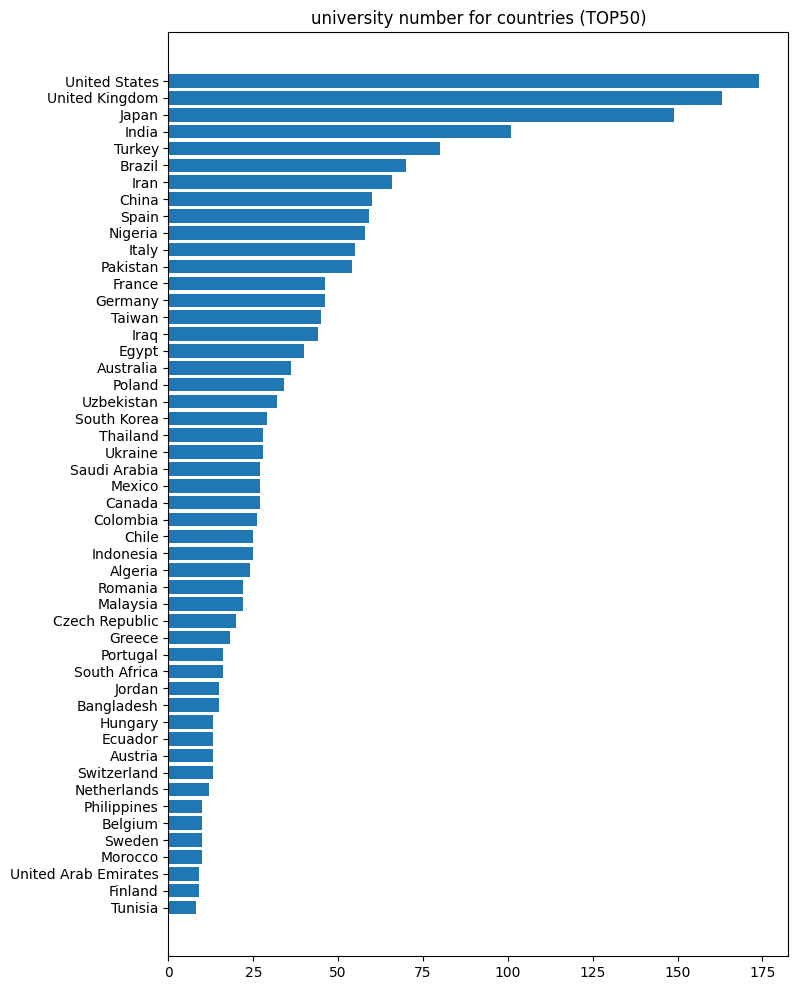

In [41]:
x=df["Location"].value_counts()[:50].sort_values(ascending=True).index
y=df["Location"].value_counts()[:50].sort_values(ascending=True)

plt.barh(x,y)
plt.title("university number for countries (TOP50)")

**Total sum of Student Number for every country**

In [42]:
student_count=df.groupby(["Location"])["Number of Student"].sum().sort_values(ascending=False)[:10]
student_count

Location
United States     3940152
Egypt             2617820
United Kingdom    1999135
China             1935959
Turkey            1934109
Brazil            1692684
Japan             1308898
Mexico            1279593
Spain             1251138
Italy             1194773
Name: Number of Student, dtype: int32

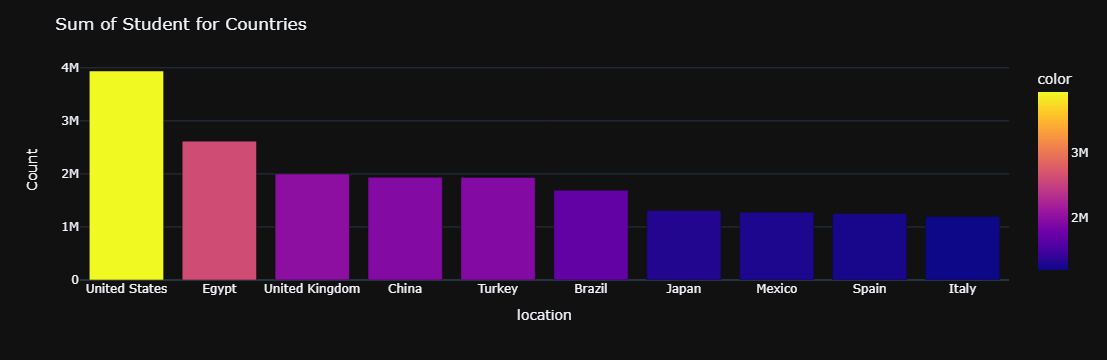

In [43]:
student_count=df.groupby(["Location"])["Number of Student"].sum().sort_values(ascending=False)[:10]
student_count
 
fig = px.bar(student_count,color=student_count)

fig.update_layout(
    template="plotly_dark",
    title_text='Sum of Student for Countries',  # Set the title of the plot
    xaxis_title="location",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
   width=1000
)

fig.show()

**TOP10 number of student count university**

In [44]:
plt.rcParams["figure.figsize"] = (8,6)

In [45]:
num_of_student=df.sort_values("Number of Student",ascending=False)[:10]
num_of_student

Rank                           University name      Location  \
986    801–1000                      Tribhuvan University         Nepal   
1713      1501+                    Payame Noor University          Iran   
806    801–1000                       Al-Azhar University         Egypt   
1164  1001–1200                University of South Africa  South Africa   
830    801–1000                          Cairo University         Egypt   
648     601–800                       University of Dhaka    Bangladesh   
809    801–1000                     Alexandria University         Egypt   
1118  1001–1200  National Autonomous University of Mexico        Mexico   
1681      1501+            National University of Córdoba     Argentina   
998    801–1000                        Zagazig University         Egypt   

      Number of Student  Number of student per staffs  International Student  \
986              460632                          30.9                    0.0   
1713             454155                         124.7                    1.0   
806              425977                          38.4                    6.0   
1164             236282                         232.2                    3.0   
830              224216                          36.8                    4.0   
648              211424                          16.1                    3.0   
809              202206                          28.2                    4.0   
1118             172729                          17.4                    4.0   
1681             167063                          16.2                    1.0   
998              165556                          26.4                    2.0   

     Female : male ratio  count  International Student Number  \
986              50 : 50      1                          0.00   
1713             60 : 40      1                       4541.55   
806              38 : 62      1                      25558.62   
1164             73 : 27      1                       7088.46   
830              54 : 46      1                       8968.64   
648              48 : 52      1                       6342.72   
809              52 : 48      1                       8088.24   
1118             52 : 48      1                       6909.16   
1681             64 : 36      1                       1670.63   
998              52 : 48      1                       3311.12   

      Local Student Number  Male Student Number  Female Student Number  \
986              460632.00               230316                 230316   
1713             449613.45               181662                 272493   
806              400418.38               264106                 161871   
1164             229193.54                63796                 172486   
830              215247.36               103139                 121077   
648              205081.28               109940                 101484   
809              194117.76                97059                 105147   
1118             165819.84                82910                  89819   
1681             165392.37                60143                 106920   
998              162244.88                79467                  86089   

      Staff Number      Continent  
986        14907.0           Asia  
1713        3642.0           Asia  
806        11093.0         Africa  
1164        1018.0         Africa  
830         6093.0         Africa  
648        13132.0           Asia  
809         7170.0         Africa  
1118        9927.0  North America  
1681       10313.0  South America  
998         6271.0         Africa

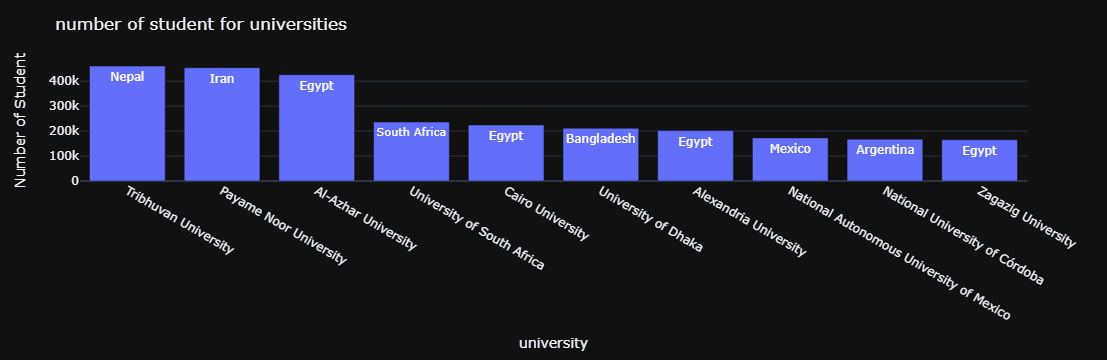

In [46]:
fig = px.bar(num_of_student,x=num_of_student["University name"],y=num_of_student["Number of Student"],
       text=num_of_student["Location"])

fig.update_layout(
    template="plotly_dark",
    title_text='number of student for universities',  # Set the title of the plot
    xaxis_title="university",  # Label for the x-axis
    yaxis_title="Number of Student",  # Label for the y-axis
    width=1000
)

**Student count of international students**

In [47]:
international_sum=df.groupby(["Location"])["International Student Number"].sum().sort_values(ascending=False)
international_sum=international_sum[:30]
international_sum

Location
United Kingdom     632810.15
United States      499549.86
Australia          278495.91
France             194553.20
Canada             173999.80
Germany            152923.10
Spain              142447.42
Turkey             127481.53
China               83426.53
Egypt               79915.41
Italy               76274.81
Japan               73753.49
Netherlands         70891.04
Saudi Arabia        48002.36
Switzerland         47273.14
Czech Republic      45055.81
Portugal            41941.39
Belgium             40440.87
New Zealand         39694.57
Taiwan              37580.80
South Korea         37000.27
Poland              34422.03
Austria             34278.67
Malaysia            32957.15
Northern Cyprus     29375.99
Hungary             28366.17
South Africa        27657.30
India               25030.97
Jordan              24578.30
Hong Kong           24314.55
Name: International Student Number, dtype: float64

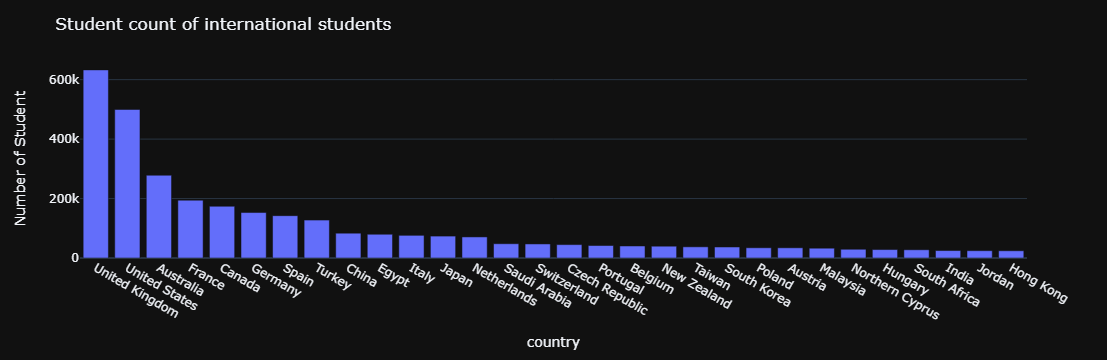

In [48]:
fig=px.bar(x=international_sum.index,y=international_sum)

fig.update_layout(
    template="plotly_dark",
    title_text='Student count of international students',  # Set the title of the plot
    xaxis_title="country",  # Label for the x-axis
    yaxis_title="Number of Student",  # Label for the y-axis
    width=1200
)

**Lets see student number for every continent**

In [49]:
continent_uni=df["Continent"].value_counts()
continent_uni

Continent
Asia             787
Europe           638
North America    232
Africa           183
South America    151
Oceania           45
Name: count, dtype: int64

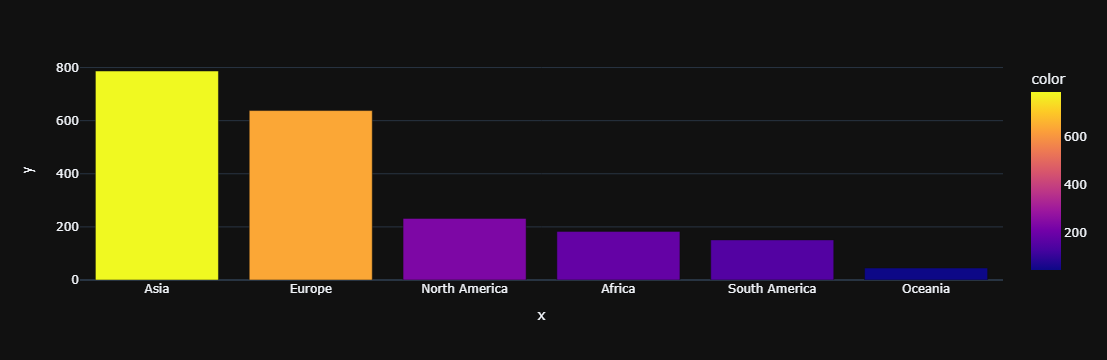

In [50]:
px.bar(x=continent_uni.index,y=continent_uni,template="plotly_dark",color=continent_uni,width=800)

**lets see   Continent - Number of student per staffs**

In [51]:
continent_staff=df.groupby(["Continent"])["Number of student per staffs"].mean()
continent_staff

Continent
Africa           24.816393
Asia             17.697459
Europe           19.569436
North America    16.223707
Oceania          28.104444
South America    18.247682
Name: Number of student per staffs, dtype: float64

Text(0, 0.5, 'Number of student per staffs')

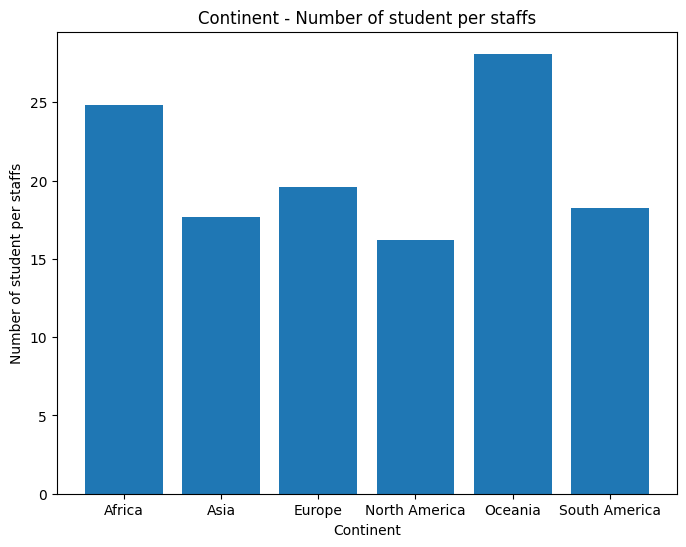

In [52]:
plt.bar(continent_staff.index,continent_staff)
plt.title("Continent - Number of student per staffs")
plt.xlabel("Continent")
plt.ylabel("Number of student per staffs") # best is north america

**lets choose 10 random country and observe their gender distribution in one bar**

In [53]:
plt.rcParams["figure.figsize"] = (12,6)

In [54]:
gender_loc=df.groupby(["Location"])[["Female Student Number","Male Student Number"]].sum()
gender_loc

Female Student Number  Male Student Number
Location                                              
Algeria                    393043               251170
Argentina                  169295               103697
Armenia                      1148                 4594
Australia                  501125               388934
Austria                     63558                51483
...                           ...                  ...
Uzbekistan                 132218               157226
Venezuela                   22962                17782
Vietnam                    128488               125182
Zambia                       8781                15110
Zimbabwe                    10505                10093

[116 rows x 2 columns]

In [55]:
random_countries=gender_loc.sample(n = 10)
random_countries

Female Student Number  Male Student Number
Location                                                
Cyprus                        11484                 8596
Latvia                        19944                15081
Fiji                           6990                 5062
Saudi Arabia                 349491               263486
Estonia                       12742                 9410
Egypt                       1295944              1321877
Netherlands                  155344               130749
Costa Rica                    20447                21749
Zimbabwe                      10505                10093
Namibia                       18796                10573

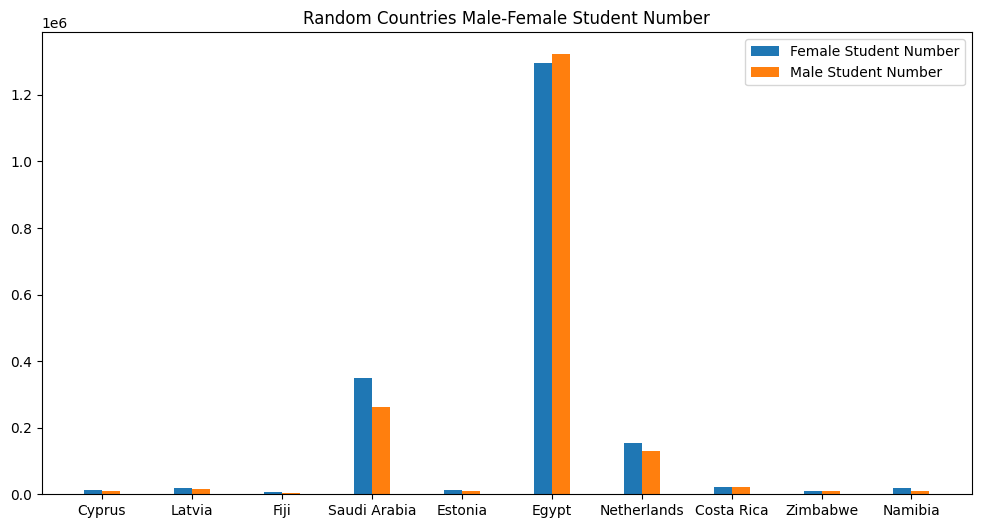

In [56]:
x=random_countries
X_axis = np.arange(len(x))

y1=random_countries["Female Student Number"]
y2=random_countries["Male Student Number"]
  
plt.bar(X_axis-0.1,y1,0.2,label="Female Student Number")
plt.bar(X_axis+0.1,y2,0.2,label="Male Student Number")

plt.xticks(X_axis, random_countries.index) # IMPORTANTE

plt.title("Random Countries Male-Female Student Number")

plt.legend()

**we drew enough of bar ,now lets draw some scatter plots , graphs**

<Axes: >

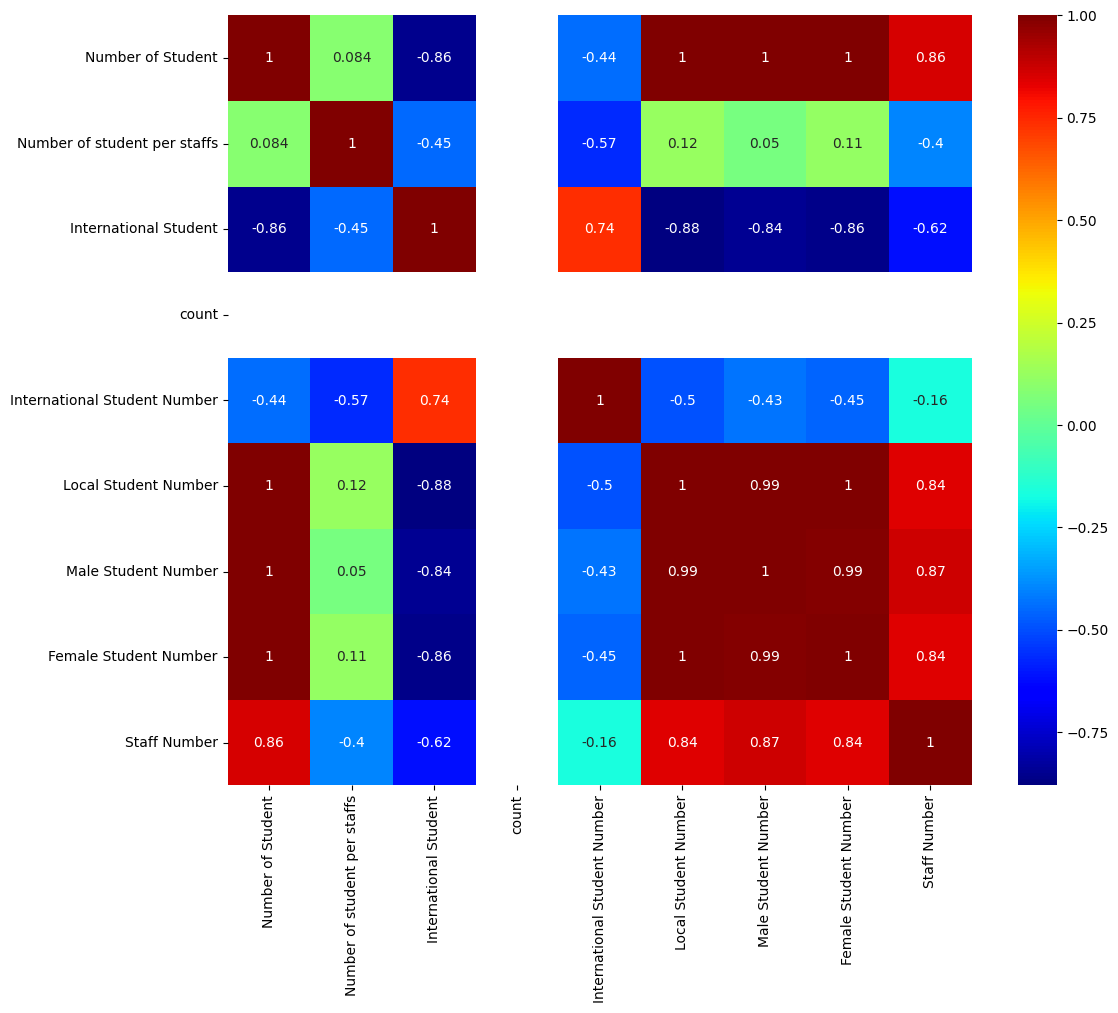

In [57]:
# first lets draw correlation matrix
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(12,10))
sns.heatmap(corr.corr(), annot=True, cmap='jet')

**there is a strong connection btwn Staff Number - Number of Student lets see this in scatter**

In [58]:
plt.rcParams["figure.figsize"] = (8,6)

Text(0, 0.5, 'Student Number')

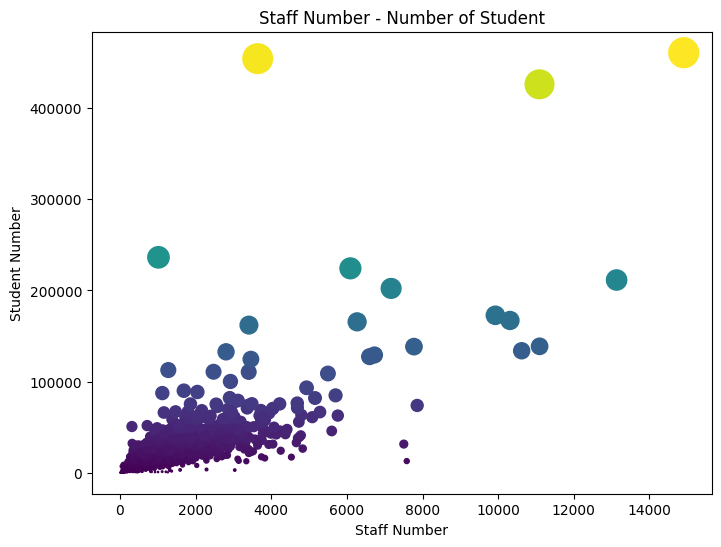

In [59]:
x=df["Staff Number"]
y=df["Number of Student"]
 
plt.scatter(x,y,c=y,s=y*0.001)
plt.title("Staff Number - Number of Student")
plt.xlabel("Staff Number")
plt.ylabel("Student Number")

In [60]:
# local student number and universty count may have strong connection lets try to see this
student_count_local_student=df.groupby(["Location"])[["count","Local Student Number"]].sum()
student_count_local_student

count  Local Student Number
Location                               
Algeria        24             655581.49
Argentina       5             269661.23
Armenia         1               5627.16
Australia      36             611563.09
Austria        13              80763.33
...           ...                   ...
Uzbekistan     32             301418.49
Venezuela       4              40148.99
Vietnam         6             251677.58
Zambia          2              23721.97
Zimbabwe        1              20598.00

[116 rows x 2 columns]

Text(0.5, 1.0, 'Universty Count - Local Student Number ')

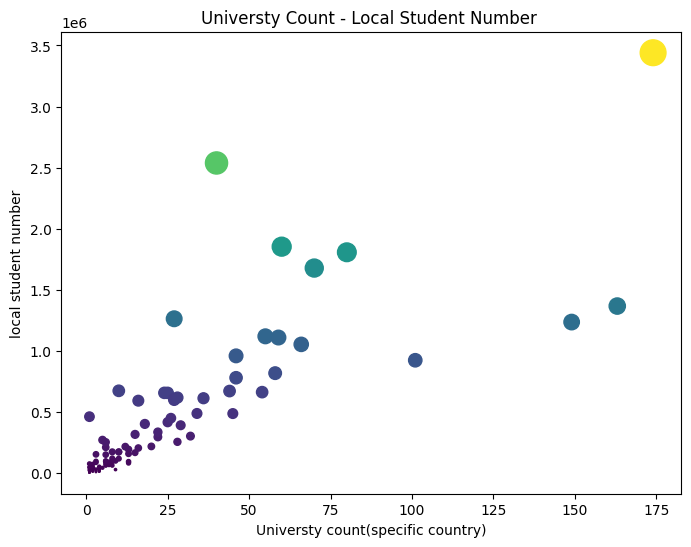

In [61]:
plt.scatter(student_count_local_student["count"],student_count_local_student["Local Student Number"],
            s=student_count_local_student["Local Student Number"]*0.0001
            ,c=student_count_local_student["Local Student Number"])
plt.xlabel("Universty count(specific country)")
plt.ylabel("local student number")
plt.title("Universty Count - Local Student Number ")

**there is a negative correlation between International Student Percentage - Local Student Number lets see this in scatter**

Text(0, 0.5, ' Local Student Number')

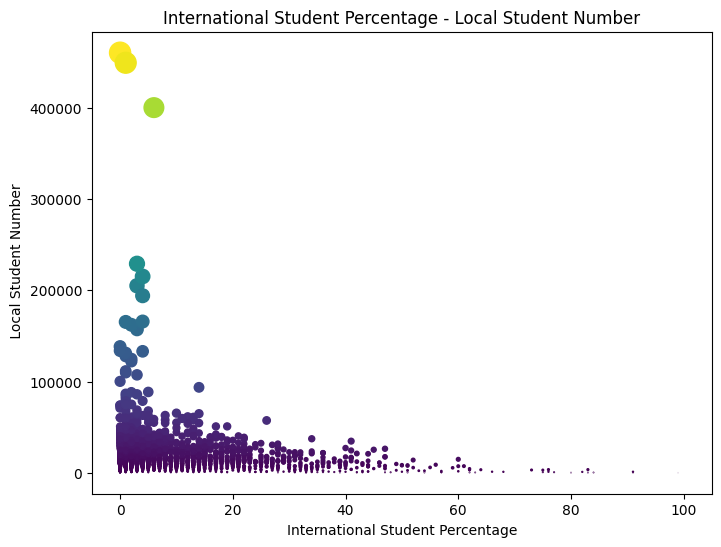

In [62]:
x=df["International Student"]
y=df["Local Student Number"]

plt.scatter(x,y,s=y*0.0005,c=y)
plt.title("International Student Percentage - Local Student Number") 
plt.xlabel("International Student Percentage")
plt.ylabel(" Local Student Number")

**lets choose random countries and see Ranking-Staff Number connection in graph**

In [63]:
index_list=np.random.randint(low=0, high=150, size=(1,20), dtype=int)# choose btwn 0-150
index_list=np.sort(index_list,axis=1) # sort index ascending

In [64]:
x=df.iloc[index_list[0]]["Rank"]
y=df.iloc[index_list[0]]["Staff Number"]

Text(0.5, 1.0, 'Ranking - Staff Number')

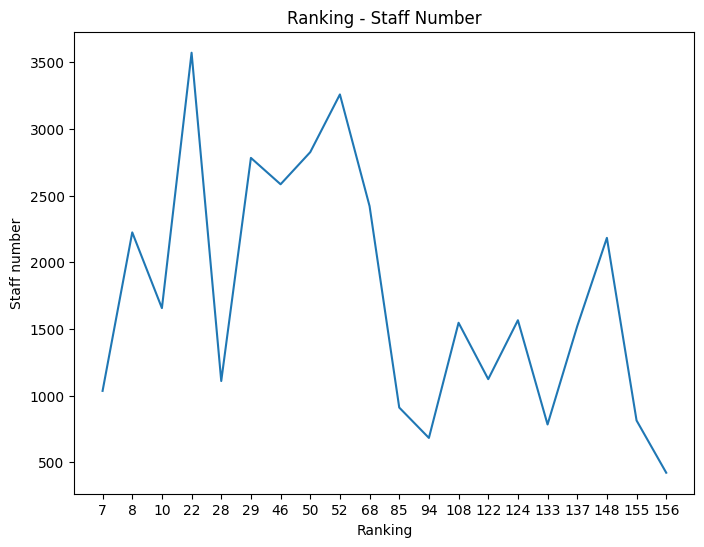

In [65]:
plt.plot(x,y)
plt.xlabel("Ranking")
plt.ylabel("Staff number")
plt.title("Ranking - Staff Number")

**lets see Rank-International student number in scatter**

Text(0.5, 0, 'Rank')

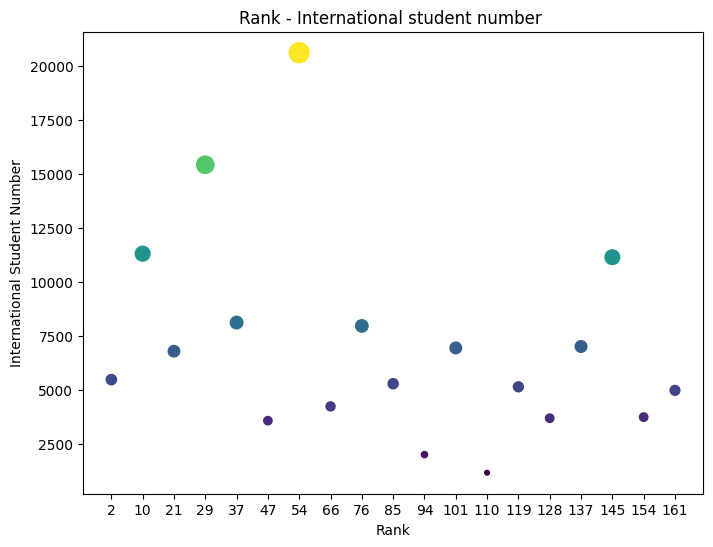

In [66]:
x=df["Rank"][1:150:8] # from 1 to 150  , 10 by 10
y=df["International Student Number"][1:150:8]
plt.scatter(x,y,s=y*0.01,c=y)
plt.title("Rank - International student number ")
plt.ylabel("International Student Number")
plt.xlabel("Rank")

**lets see distribution of student number for countries**

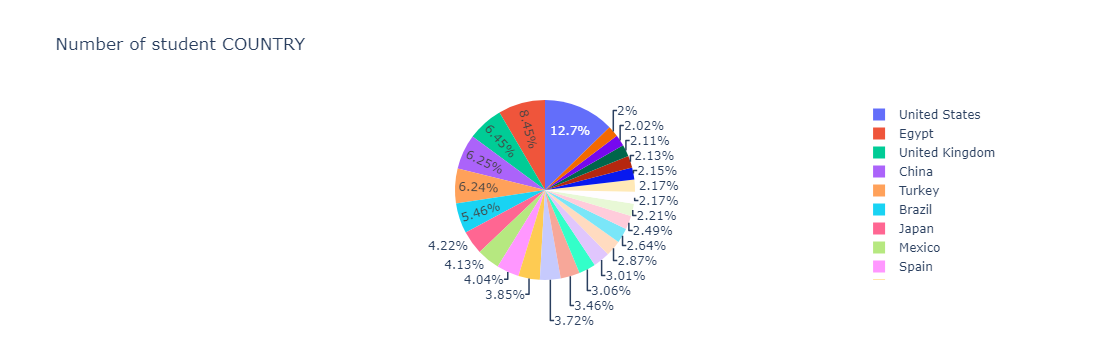

In [67]:
countries=df.groupby(["Location"])["Number of Student"].sum().sort_values(ascending=False)[:25]

fig = px.pie(countries, values=countries, names=countries.index, title='Number of student COUNTRY')

fig.show()